Populating the interactive namespace from numpy and matplotlib
Epoch 1/2500
143/143 [==============================] - 0s - loss: 0.0281 - acc: 0.0070     
Epoch 2/2500
143/143 [==============================] - 0s - loss: 0.0238 - acc: 0.0070         
Epoch 3/2500
143/143 [==============================] - 0s - loss: 0.0231 - acc: 0.0070         
Epoch 4/2500
143/143 [==============================] - 0s - loss: 0.0233 - acc: 0.0070         
Epoch 5/2500
143/143 [==============================] - 0s - loss: 0.0231 - acc: 0.0070         
Epoch 6/2500
143/143 [=======================

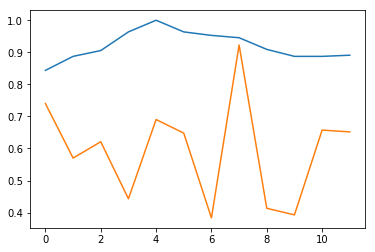

In [6]:
import dataPreparation
import datetime
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt 

# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline

numElements = 6
daysPerSet = 5

#List of symbols to grab
symList = ["AERO"]

#Grab the training data
start = datetime.datetime(2016,6,1)
end = datetime.datetime(2017,1,1)


trainingData, trainingOutput = dataPreparation.createTrainingData(symList, start, end, daysPerSet)

#Grab the test data
start = datetime.datetime(2017,3,1)
end = datetime.date.today()
    
testData, testOutput = dataPreparation.createTrainingData(symList, start, end, daysPerSet)
    
inputSize = daysPerSet * numElements

model = Sequential()
#Create the input layer with 32 outputs and the given inputs
model.add(Dense(256, input_dim=inputSize, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
#Create an activation layer with a sigmoid activation function
#model.add(Activation('sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])


trainingOutput = trainingOutput / trainingOutput.max(axis=0)

testOutput = testOutput / testOutput.max(axis=0)



model.fit(trainingData, trainingOutput, nb_epoch=2500, batch_size=50)
#print(hist.history)
trainingRes = model.predict(trainingData, verbose = 0)
testRes = model.predict(testData, verbose = 0)

score = model.evaluate(testData, testOutput, verbose=1)

print("Score:", score)
#plt.plot(trainingOutput)
#plt.plot(trainingRes)
plt.plot(testOutput)
plt.plot(testRes)